In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [15]:
df = pd.read_csv("./input/adult_data.csv")

In [16]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10611 entries, 39 to 38
Data columns (total 14 columns):
age               10611 non-null object
workclass         10611 non-null int64
fnlwgt            10611 non-null object
education         10611 non-null int64
marital-status    10611 non-null object
occupation        10610 non-null object
relationship      10610 non-null object
race              10610 non-null object
sex               10610 non-null object
capital-gain      10610 non-null float64
capital-loss      10610 non-null float64
hours-per-week    10610 non-null float64
native-country    10610 non-null object
income            10610 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


In [18]:
df[ df["income"].isnull() ]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
38,Federal-gov,216924,Assoc-voc,11,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is only one record that doesn't have data associated with it, including the target variable - it might be safer to just delete it:

In [19]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10610 entries, 39 to 60
Data columns (total 14 columns):
age               10610 non-null object
workclass         10610 non-null int64
fnlwgt            10610 non-null object
education         10610 non-null int64
marital-status    10610 non-null object
occupation        10610 non-null object
relationship      10610 non-null object
race              10610 non-null object
sex               10610 non-null object
capital-gain      10610 non-null float64
capital-loss      10610 non-null float64
hours-per-week    10610 non-null float64
native-country    10610 non-null object
income            10610 non-null object
dtypes: float64(3), int64(2), object(9)
memory usage: 1.2+ MB


Let's see how income level is correlated to other data:

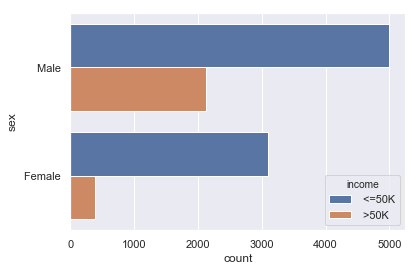

In [20]:
sns.countplot(data=df, y="sex", hue="income");

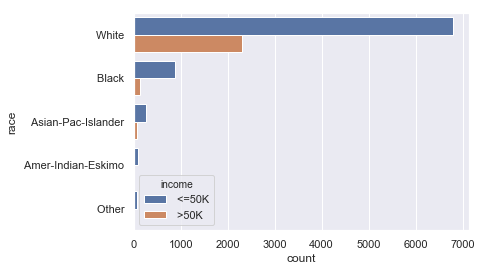

In [21]:
sns.countplot(data=df, y="race", hue="income");

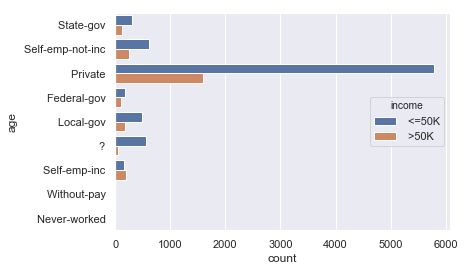

In [22]:
sns.countplot(data=df, y="age", hue="income");

What are countries for which we have observations?

In [23]:
df["native-country"].value_counts()

 United-States                 9476
 Mexico                         219
 ?                              192
 Philippines                     56
 Germany                         48
 Canada                          47
 Puerto-Rico                     43
 Jamaica                         32
 Cuba                            32
 England                         32
 China                           31
 El-Salvador                     30
 South                           30
 India                           29
 Vietnam                         25
 Dominican-Republic              24
 Iran                            23
 Poland                          22
 Italy                           22
 Guatemala                       21
 Japan                           20
 Taiwan                          19
 Greece                          17
 Haiti                           15
 Portugal                        12
 Columbia                        10
 Nicaragua                       10
 Peru                       

Majority is in United States, so let's check them separately:

In [24]:
us_df = df[ df["native-country"] == " United-States" ]
non_us_df = df[ df["native-country"] != " United-States" ]

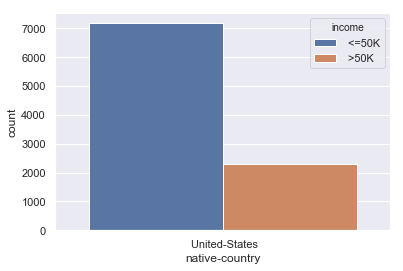

In [25]:
sns.countplot(data=us_df, x="native-country", hue="income");

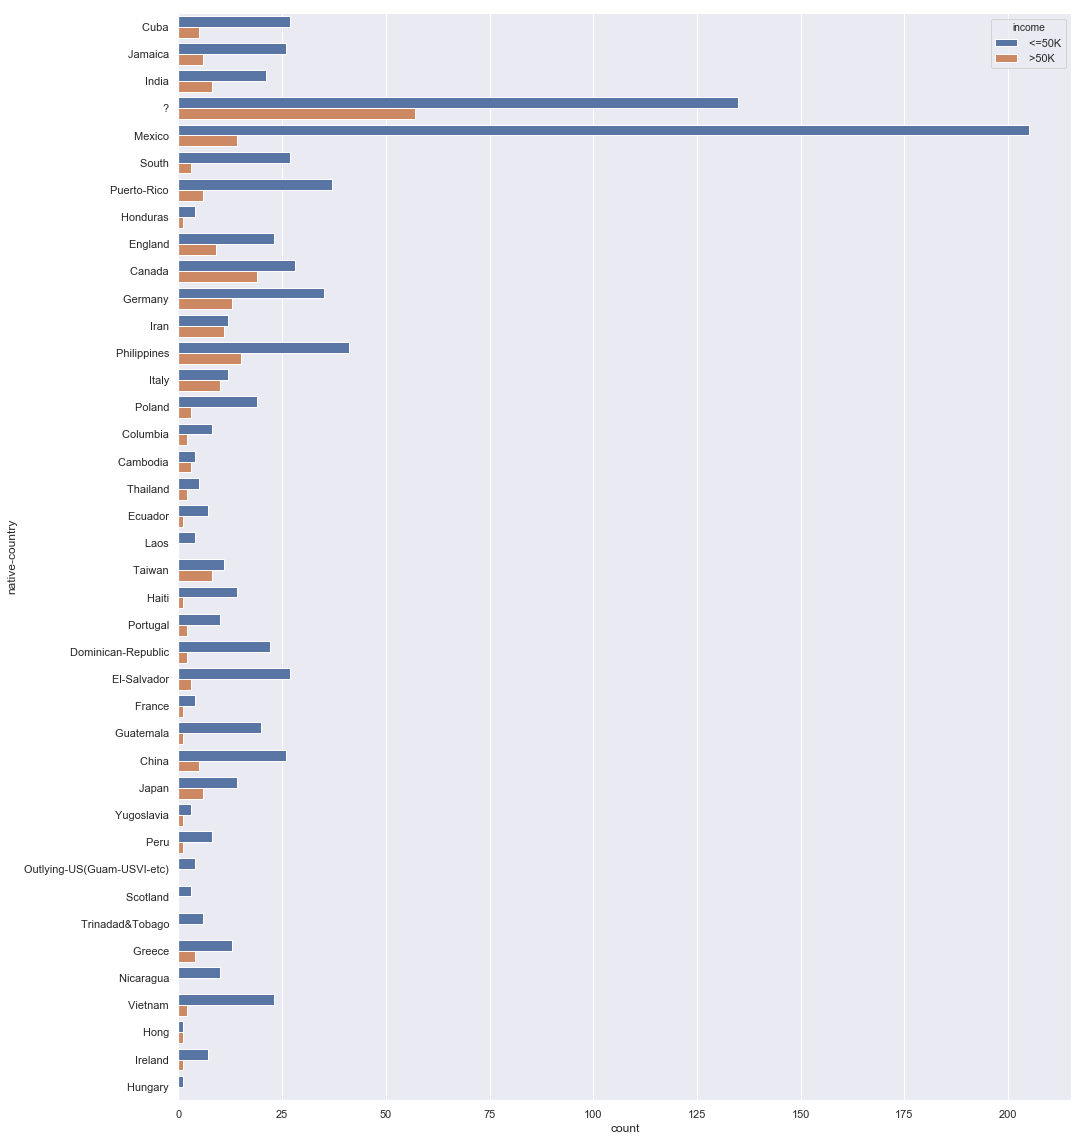

In [26]:
plt.figure(figsize=(16,20))
sns.countplot(data=non_us_df, y="native-country", hue="income");

How does it look like based on occupation?

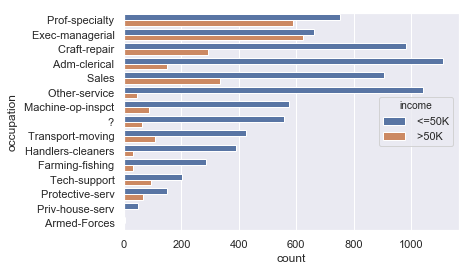

In [27]:
descending_order = df["occupation"].value_counts().sort_values(ascending=False).index
sns.countplot(data=df, y="occupation", hue="income", order=descending_order);

And based on personal relations?

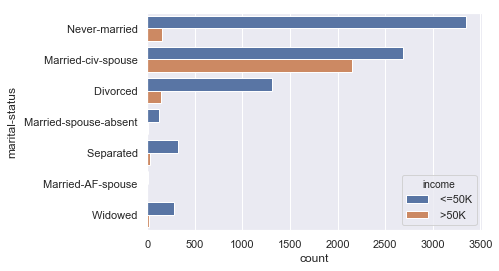

In [28]:
sns.countplot(data=df, y="marital-status", hue="income");

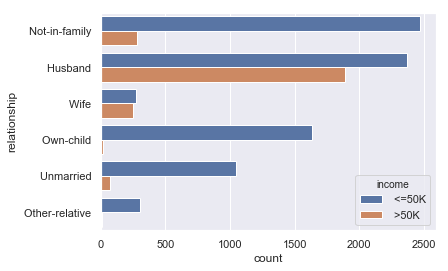

In [29]:
sns.countplot(data=df, y="relationship", hue="income");

## Let's Engineer some features

Target variable has to be represented as numer

In [30]:
df["income_cat"] = df["income"].factorize()[0]
df[["income", "income_cat"]][:5]

,income,income_cat
39,<=50K,0
50,<=50K,0
38,<=50K,0
53,<=50K,0
28,<=50K,0


Let's also add new feature `"male"`:

In [31]:
df["male"] = df["sex"].map(lambda x: 1 if x == " Male" else 0)

I might have downloaded corrupted file and data associated to `"age"` column sounds misleading, but this is not much of a problem to continue. It looks like it represents the sector the person worked, let's see what values it holds:

In [32]:
df["age"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Let's try groupping them to create fewer, possibly more meaning full catgories:

In [33]:
df["age_cat"] = df["age"]

df["age_cat"] = df["age_cat"].replace([' State-gov', ' Federal-gov', ' Local-gov'], "gov")
df["age_cat"] = df["age_cat"].replace([' Self-emp-not-inc', ' Self-emp-inc'], "self_empl")
df["age_cat"] = df["age_cat"].replace(' Private', "empl")
df["age_cat"] = df["age_cat"].replace([' ?', ' Without-pay', ' Never-worked'], "other")

And now, let's _OneHotEncode_ them:

In [34]:
df = pd.get_dummies(df, columns=["age_cat"])
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_cat,male,age_cat_empl,age_cat_gov,age_cat_other,age_cat_self_empl
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0,1,0,1,0,0
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0,1,0,0,0,1
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0,1,1,0,0,0
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0,1,1,0,0,0
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0,0,1,0,0,0


Most of the data is recored for people, whose `"native-country"` is `"United States"` - would the be enough to distinguish if the person is from US or not? Let's create new feature:

In [35]:
df["in_us"] = df["native-country"].map(lambda x: 1 if x == " United-States" else 0)

With some new features engineered, let's see how correlation to the target variable looks like, to decide on which ones we want to include to first models:

In [36]:
df.corr()["income_cat"].sort_values(ascending=False)

income_cat           1.000000
education            0.324409
hours-per-week       0.226346
capital-gain         0.219655
male                 0.205186
capital-loss         0.148504
age_cat_self_empl    0.112510
age_cat_gov          0.054077
in_us                0.030350
workclass           -0.017937
age_cat_empl        -0.076566
age_cat_other       -0.080663
Name: income_cat, dtype: float64

The four most related features are: `education`, `hours-per-week`, `capital-gain` and `male`; Unfotunately, most of features engineered don't show strong correlation, so we will not pick them to first experiments.

## Training the model

We've seen which features are most correlated to the `income` level, so we will pick them for training the model, as a very first step, we will also put some data aside for future model testing:

In [114]:
from sklearn.model_selection import train_test_split

features = [
    "education",
    "hours-per-week",
    "capital-gain",
    "male"
]

X = df[ features ]
y = df["income_cat"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

Let's first try very simple models - Decision Tree and Random Forest:

In [66]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8175650207312476

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.8186958160572936

The results are very promissing! Without much model tuning, we were able to achieve accuracy about `81.8%`!

Let's then try to tweak the models' parameters and see if the results can improve. For this, I'll use `GridSearch` technique:

In [77]:
from sklearn.model_selection import GridSearchCV

params_for_tree = [
    {"max_depth": [1, 2, 3, 5, 10, 20, None], "max_features": [0.1, 0.2, 0.5, 0.8]}
]

grid_for_tree = GridSearchCV(DecisionTreeClassifier(), params_for_tree, 
                             n_jobs=8, cv=5, return_train_score=True,
                             verbose=2)
grid_for_tree.fit(X_train, y_train);

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done 140 out of 140 | elapsed:    0.3s finished


In [78]:
grid_for_tree.best_score_

0.8200326756315194

For the `DecisionTreeClassifier` we were able to improve by `~0.3%` - exciting!

Let's do the same for `RandomForestClassifier`:

In [125]:
params_for_forest = [
    {"bootstrap": (True, False),
     "n_estimators": [10, 20, 50, 100],
     "max_depth": [1, 2, 3, 5, 10, 20, None], 
     "max_features": [0.1, 0.2, 0.5, 0.8]}
]

grid_for_forest = GridSearchCV(RandomForestClassifier(), params_for_forest, 
                               n_jobs=8, cv=5, return_train_score=True,
                               verbose=4)
grid_for_forest.fit(X_train, y_train);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.2s finished


In [126]:
grid_for_forest.best_score_

0.8251853713711198

When searching for the optimal parameters for `RandomForest` we were able to increase accuracy by `~0.7%` (from `81.8%` to `82.5%`), and the parameters are as follows:

In [127]:
grid_for_forest.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 0.5, 'n_estimators': 50}

Looks like the best parameters are not the max values provided to `GridSearch`, so there is no point of continuing the search.

Let's try one more model - `KNN`:

In [129]:
from sklearn.neighbors import KNeighborsClassifier

neighbours = KNeighborsClassifier()
neighbours.fit(X_train, y_train)
neighbours.score(X_test, y_test)

0.8009800226159065

In [130]:
params_for_neighbours = [
    {"n_neighbors": [1, 2, 3, 5, 10, 15],
     "weights": ["uniform", "distance"],
     "algorithm": ["ball_tree", "kd_tree", "brute"]}
]

grid_for_knn = GridSearchCV(KNeighborsClassifier(), params_for_neighbours, 
                            n_jobs=8, cv=5, return_train_score=True,
                            verbose=4)
grid_for_knn.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.3s
/Users/pawel.dawczak/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/pawel.dawczak/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=8)]: Done 148 tasks      | elapsed:   11.5s
/Users/pawel.dawczak/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were 

In [131]:
grid_for_knn.best_score_

0.820535377654895

From the experiments we've seen, the models' accuracy was like follows:

| Model         | Best accuracy |
|---------------|---------------|
| Decision Tree |         82.0% |
| Random Forest |         82.5% |
| KNN           |         82.1% |

Let's deploy the instance of trained `RandomForest`:

1. Let's generate the Ruby code:

In [133]:
from sklearn_porter import Porter

porter = Porter(grid_for_forest.best_estimator_, language='ruby')
output = porter.export(embed_data=True, class_name="Ml::IncomeClassifierModel")

2. Next, let's save the content to the file:

In [134]:
with open('../app/lib/ml/income_classifier_model.rb', 'w') as f:
    f.write(output)

**Caution:** Please be advised - opening the generated file for review might be a bit _challenging_, as the generated files is quite lenghty - around `50k` lines of code!

```sh
~/Projects/how_much
▶ cat app/lib/ml/income_classifier_model.rb | wc -l
   47923
```

This, however, shouldn't be a problem for Ruby to execute it!

## A Word about what's generated:

The generated class is of format:

```ruby
class Ml::IncomeClassifierModel
  # ...
  
  def self.predict(features)
    # ...
  end
  
  # ...
end
```

The main entry point will be `predict` method, that accepts a list of paramteres in following format:

```ruby
Ml::IncomeClassifierModel.predict([
  10, # value associated to education
  40, # value associated to hours_per_week
   0, # value associated to capital_gain
   1  # value indicating 1 for male or 0 for female
])
```

and the returned value will be either `0` indicating `"<= 50K"` income class or `1` indicating `"> 50K"` income class.